In [36]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import os

In [37]:
base_dir = os.getcwd()


print("Base directory: {}".format(base_dir))

def load_mat_file(path):
    """Load a .mat file and return the loaded data."""
    data = scipy.io.loadmat(path)
    return data

# Function to save figures
def save_figure(fig, filename, title=None):
    directory = os.path.join(base_dir, "Thesis Draft", "figures")
    report_file = os.path.join(base_dir, "Thesis Draft", "reports", "report1.tex")

    if not os.path.exists(directory):
        os.makedirs(directory)
    
    fig_path = os.path.join(directory, filename)
    fig.savefig(fig_path)

    if title is None:
        # Remove the file extension
        base_name = os.path.splitext(filename)[0]
        # Replace underscores with spaces and capitalize each word
        title = base_name.replace('_', ' ').title()

    # Check if the figure path is already in the file
    fig_include_str = fig_path.replace('\\', '/')
    with open(report_file, 'r') as f:
        content = f.read()
        if fig_include_str in content:
            return

    # Add the figure to the summary file
    with open(report_file, 'a') as f:
        f.write("\\begin{figure}[h]\n")
        f.write("\\centering\n")
        f.write("\\includegraphics[width=0.8\\textwidth]{{{}}}\n".format(fig_path.replace('\\', '/')))
        f.write("\\caption{{{}}}\n".format(title))
        f.write("\\end{figure}\n\n")

    plt.close(fig)

Base directory: c:\Users\barbo\brain classifier repo\brain_classifier\src


In [38]:
base_dir

'c:\\Users\\barbo\\brain classifier repo\\brain_classifier\\src'

In [60]:
# Load connectivity data from .mat file
data_path = os.path.join(base_dir, "..", "new_data", "scfc_schaefer100_ya_oa.mat")
data = load_mat_file(data_path)

# Load features from .mat files
mod_deg_zscore_path = os.path.join(base_dir, "..", "new_data", "mod_deg_zscore_scfc.mat")
part_coeff_path = os.path.join(base_dir, "..", "new_data", "part_coeff_scfc.mat")

mod_deg_zscore_data = load_mat_file(mod_deg_zscore_path)
part_coeff_data = load_mat_file(part_coeff_path)

# Extract the content of the 'data' key
data_content = data['data'][0, 0]

"""
# Print the fields in data_content
print("data_content fields:", data_content.dtype.names)
# Check if any field names suggest age information
for field in data_content.dtype.names:
    print(f"Field: {field}, Type: {type(data_content[field])}, Shape: {np.shape(data_content[field]) if hasattr(data_content[field], 'shape') else 'N/A'}")
"""

# Extract the connectivity matrices and store them in a dictionary
matrices = {
    'sc_ya': np.array(data_content['sc_ya']),
    'fc_ya': np.array(data_content['fc_ya']),
    'sc_oa': np.array(data_content['sc_oa']),
    'fc_oa': np.array(data_content['fc_oa'])
}

# Print the type and shape of the matrices
"""
for key, matrix in matrices.items():
    print(f"{key}: Type: {type(matrix)}, Shape: {matrix.shape}") 
    # sc_ya: Type: <class 'numpy.ndarray'>, Shape: (100, 100, 101)
    # fc_ya: Type: <class 'numpy.ndarray'>, Shape: (100, 100, 101)
    # sc_oa: Type: <class 'numpy.ndarray'>, Shape: (100, 100, 78)
    # fc_oa: Type: <class 'numpy.ndarray'>, Shape: (100, 100, 78)
"""

# Extract the age data and store them in a dictionary
ages = {
    'age_ya': np.array(data_content['age_ya']).flatten(),
    'age_oa': np.array(data_content['age_oa']).flatten()
}

# assume first 101 columns are the ya features, last 78 are the oa features
mod_deg_zscore = {
    'fc_ya': np.array(mod_deg_zscore_data['mdz_fc'][:, :101]),
    'fc_oa': np.array(mod_deg_zscore_data['mdz_fc'][:, 101:]),
    'sc_ya': np.array(mod_deg_zscore_data['mdz_sc'][:, :101]),
    'sc_oa': np.array(mod_deg_zscore_data['mdz_sc'][:, 101:])
}

part_coeff = {
    'fc_ya': np.array(part_coeff_data['pc_fc'][:, :101]),
    'fc_oa': np.array(part_coeff_data['pc_fc'][:, 101:]),
    'sc_ya': np.array(part_coeff_data['pc_sc'][:, :101]),
    'sc_oa': np.array(part_coeff_data['pc_sc'][:, 101:])
}

print("mod_deg_zscore['fc_ya'].shape:", mod_deg_zscore['fc_ya'].shape)
print("mod_deg_zscore['fc_oa'].shape:", mod_deg_zscore['fc_oa'].shape)

print("part_coeff['fc_ya'].shape:", part_coeff['fc_ya'].shape)
print("part_coeff['fc_oa'].shape:", part_coeff['fc_oa'].shape)


mod_deg_zscore['fc_ya'].shape: (100, 101)
mod_deg_zscore['fc_oa'].shape: (100, 78)
part_coeff['fc_ya'].shape: (100, 101)
part_coeff['fc_oa'].shape: (100, 78)


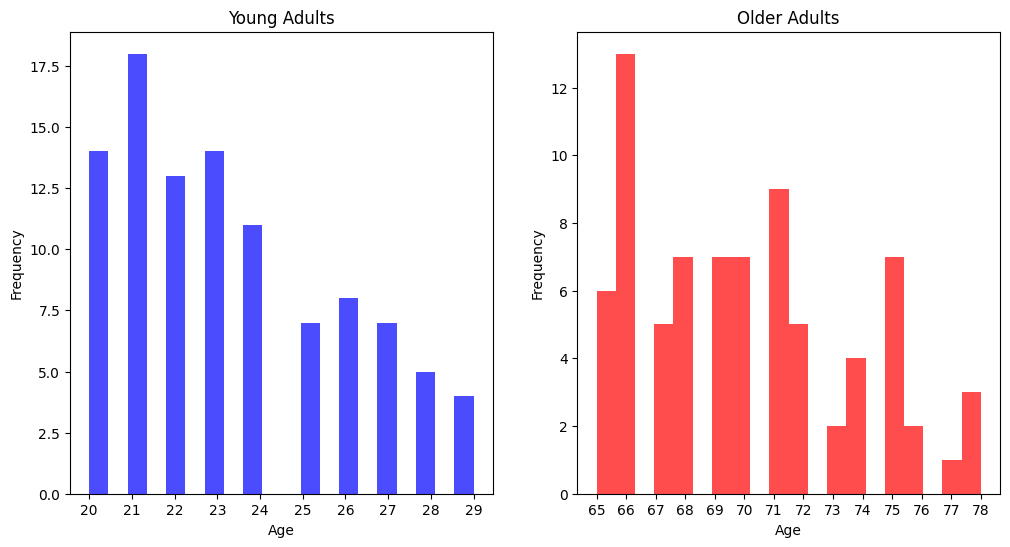

Mean age of young adults: 23.346534653465348, std: 2.6153985878927917
Mean age of older adults: 70.01282051282051, std: 3.6461908108768544


In [40]:
# Print a histogram of the ages
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Young Adults
ax[0].hist(ages['age_ya'], bins=20, color='blue', alpha=0.7)
ax[0].set_title("Young Adults")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Frequency")
ax[0].set_xticks(np.unique(ages['age_ya']))

# Older Adults
ax[1].hist(ages['age_oa'], bins=20, color='red', alpha=0.7)
ax[1].set_title("Older Adults")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Frequency")
ax[1].set_xticks(np.unique(ages['age_oa']))

plt.show()

# print the mean and std of the ages
print(f"Mean age of young adults: {np.mean(ages['age_ya'])}, std: {np.std(ages['age_ya'])}")
print(f"Mean age of older adults: {np.mean(ages['age_oa'])}, std: {np.std(ages['age_oa'])}")

In [41]:
# Check feasibility of the matrices

def check_symetric(matrix):
    """Check if a matrix is symmetric."""
    return np.allclose(matrix, matrix.T)

def check_zero_diagonal(matrix):
    """Check if the diagonal of a matrix is zero."""
    return np.allclose(np.diag(matrix), 0)

def check_dimensions(matrix, expected_shape=(100, 100)):
    """Check if the matrix has the expected shape."""
    return matrix.shape == expected_shape

# Check the properties of the matrices
"""
def check_properties(matrices):
    for key, matrix in matrices.items():
        age_group, matrix_type = key.split('_')
        num_subjects = matrix.shape[2]

        for i in range(num_subjects):
            symmetric = check_symetric(matrix[:, :, i])
            zero_diagonal = check_zero_diagonal(matrix[:, :, i])
            correct_shape = check_dimensions(matrix[:, :, i], (100, 100))
            
            if not symmetric or not zero_diagonal or not correct_shape:
                print(f"{matrix_type.upper()} {age_group.capitalize()} Subject {i+1}:")
                if not symmetric:
                    print(" Not Symmetric ")
                if not zero_diagonal:
                    print(" Diagonal is not Zero ")
                if not correct_shape:
                    print(" Incorrect Shape ")

# Check properties of matrices

check_properties(matrices)
"""

'\ndef check_properties(matrices):\n    for key, matrix in matrices.items():\n        age_group, matrix_type = key.split(\'_\')\n        num_subjects = matrix.shape[2]\n\n        for i in range(num_subjects):\n            symmetric = check_symetric(matrix[:, :, i])\n            zero_diagonal = check_zero_diagonal(matrix[:, :, i])\n            correct_shape = check_dimensions(matrix[:, :, i], (100, 100))\n            \n            if not symmetric or not zero_diagonal or not correct_shape:\n                print(f"{matrix_type.upper()} {age_group.capitalize()} Subject {i+1}:")\n                if not symmetric:\n                    print(" Not Symmetric ")\n                if not zero_diagonal:\n                    print(" Diagonal is not Zero ")\n                if not correct_shape:\n                    print(" Incorrect Shape ")\n\n# Check properties of matrices\n\ncheck_properties(matrices)\n'

In [42]:
import networkx as nx

In [43]:
# preprocessing?


# Convert matrices to graphs
def matrix_to_graph(matrix):
    """Convert a matrix to a graph."""
    # matrix = np.array(matrix)
    graph = nx.from_numpy_array(matrix) 
    return graph


graphs = {}

for key, matrix in matrices.items():
    num_subjects = matrix.shape[2]
    graphs[key] = [matrix_to_graph(matrix[:, :, i]) for i in range(num_subjects)] #list of graphs

In [44]:
# Visualize the graphs

# plot node degree histogram and distribution from https://github.com/gordicaleksa/pytorch-GAT/blob/main/The%20Annotated%20GAT%20(Cora).ipynb

def plot_graph_on_axis(graph, ax, title, pos=None, partition=None):
    """Plot a graph on a given axis with node sizes proportional to the degree and edge widths proportional to the edge weights. 
        If partition is provided, nodes are colored by their community."""
    ax.set_title(title)

    # Extract edge weights
    edge_weights = [graph[u][v]['weight'] for u, v in graph.edges()]
    # Apply min-max normalization for edge thickness
    min_weight = min(edge_weights)
    max_weight = max(edge_weights)
    if min_weight != max_weight:  # Avoid division by zero
        edge_weights = [(w - min_weight) / (max_weight - min_weight) for w in edge_weights]
    else:
        edge_weights = [1 for _ in edge_weights]  # If all weights are the same, set them to 1

    # Calculate the degree of each node for node size
    degrees = dict(graph.degree())
    # Normalize the degrees to the range 0-1
    max_degree = max(degrees.values())
    min_degree = min(degrees.values())
    normalized_degrees = {node: (degree - min_degree) / (max_degree - min_degree) for node, degree in degrees.items()}
    # Set node sizes based on normalized degrees
    node_sizes = [(normalized_degrees[node] + 0.1) * 5 for node in graph.nodes()]  

    if partition:
        # If partition is provided, color nodes by their community
        cmap = plt.get_cmap('viridis', max(partition.values()) + 1)
        node_color = list(partition.values())
    else:
        node_color = 'steelblue'
    
    # Draw the graph
    if pos is None:
        pos = nx.spring_layout(graph, seed=42)
    nx.draw(graph, pos, ax=ax, node_size=node_sizes, with_labels=False, node_color=node_color, cmap=cmap if partition else None, edge_color='gray', width=edge_weights)

    return pos


def plot_and_save_graph(graphs, filename=None, positions=None, partitions=None, status="Original", with_communities=False, num_subjects=1):
    """
    Plot and save graphs for different age groups on a grid of subplots.
    
    Parameters:
    - graphs: Dictionary containing NetworkX graphs for each age group and matrix type
    - filename: name.png
    - positions: List of positions for the graphs
    - partitions: Dictionary containing partitions for the graphs of each age group and matrix type
    - status: 'Original', 'Preprocessed', or 'Louvain Preprocessed'
    - num_subjects: Number of subjects to plot (default is 1)
    """
    community_text = " with Louvain Communities" if with_communities else ""
    title = f'{status} Graphs{community_text}'
    fig, axs = plt.subplots(4, num_subjects, figsize=(15, 9))
    fig.suptitle(title, fontsize=16)

    if positions is None:
        positions = {}
    
    if partitions is None:
        partitions = {key: [None] * num_subjects for key in graphs.keys()}

    # TODO
    """for j, (key, graph_list) in enumerate(graphs.items()):
        age_group, matrix_type = key.split('_')
        title_prefix = matrix_type.upper()
        for i in range(min(num_subjects, len(graph_list))):
            if len(positions.get(key, [])) > i:
                pos = positions[key][i]
                plot_graph_on_axis(graph_list[i], axs[j, i], f"{key.upper()} Graph {i+1}", pos, partitions[key][i] if partitions[key] else None)
            else:
                pos = plot_graph_on_axis(graph_list[i], axs[j, i], f"{key.upper()} Graph {i+1}", partition=partitions[key][i] if partitions[key] else None)
                if key not in positions:
                    positions[key] = []
                positions[key].append(pos)"""

    plt.tight_layout()
    #plt.show()
    
    if filename:
        save_figure(fig, filename, title)
    
    plt.close(fig)

    return positions



# plot_and_save_graph(graphs, filename='graphs.png', status=' ', num_subjects=1)

In [45]:
import torch
import scipy.stats
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
from torch_geometric.nn import GATConv
from torch.utils.data import Dataset, random_split, Subset
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader


In [71]:
# Topological measures that significantly change with age across the lifespan
# different among structural and functional networks?

# functional connectivity topological measures
# from Cao 2014 
# Local efficiency (inverted U shape) (sex differences only in global?)
# Modularity (decrease linearly) ( without global signal regression modularity failed to detect age effects)
# Mean connectivity strength (negative quadratic trajectories)
# Normalized Rich Club coefficients (inverse U shape over a range of hub thresholds) (no significant sex differences)
# Regional Functional Connectivity Strength (rFCS) (Age-related linear and quadratic changes both positive and negative) (male higher connectivity strength in some areas)
# participation coefficient?
# centrality measures? (sub-graph centrality)

# structural connectivity topological measures

# participation coefficient
# contribution to modularity

# matching index
def calculate_connectivity_features(matrix, mod_deg_zscore, part_coeff, group):
    """Calculate node features from a connectivity matrix and additional features.
    Features are from connectivity statistics: mean, standard deviation, kurtosis, skewness,
    degree centrality of the node's connectivity vector to all the other nodes (Yang 2019),
    modular degree z-score, and participation coefficient.
    """
    num_subjects = len(mod_deg_zscore[group][0])
    all_subjects_features = []

    for s in range(num_subjects):
        node_features = []
        for i in range(matrix.shape[0] if matrix is not None else len(mod_deg_zscore[group])):
            if 'sc' in group and matrix is not None:
                # Structural features from connectivity statistics
                connections = matrix[i, :, s]
                connections = connections.flatten()
                mean = connections.mean()
                std = connections.std()
                skew = scipy.stats.skew(connections)
                kurtosis = scipy.stats.kurtosis(connections)
                # Additional features
                mod_deg = mod_deg_zscore[group][i, s]
                part_coef = part_coeff[group][i, s]
                # Calculate degree centrality
                node_features.append([mean, std, skew, kurtosis, mod_deg, part_coef])
            else:
                # Only mod_deg_zscore and participation coefficient for functional graphs or if matrix is None
                mod_deg = mod_deg_zscore[group][i, s]
                part_coef = part_coeff[group][i, s]
                node_features.append([mod_deg, part_coef])
        
        # Convert the list of lists to a numpy array before converting to a tensor
        node_features = np.array(node_features)
        all_subjects_features.append(torch.tensor(node_features, dtype=torch.float32))
    
    return all_subjects_features


#TODO: Capire se c'è variabilità nelle feature (valori medi, istogramma)
# dimensionality reduction (PCA, autoencoders) or feature selections to decrease the number of features?

def combined_graph(matrix, feature_tensor=None, feature_type='random'):
    """Combine a connectivity matrix and a feature tensor into a single graph.
    Graphs are constructed from the connectivity matrix and the node features 
    consist of the provided feature tensor. If feature_tensor is not provided,
    the user can choose between using a random tensor or an identity tensor.
    
    Parameters:
    - matrix: The connectivity matrix.
    - feature_tensor: List of feature tensors. If None, feature_type is used.
    - feature_type: The type of tensor to use if feature_tensor is None. Options are 'random' or 'identity'.
    """
    
    # Turn matrix into torch tensor
    tensor_matrix = torch.tensor(matrix, dtype=torch.float)

    # Initialize empty list for storing graph data objects
    graph_list = []

    # Determine the number of subjects and nodes
    num_subjects = tensor_matrix.shape[2]
    num_nodes = tensor_matrix.shape[0]

    # Generate feature tensor if not provided
    if feature_tensor is None:
        if feature_type == 'random':
            feature_tensor = [torch.rand((num_nodes, 4), dtype=torch.float32) for _ in range(num_subjects)]
        elif feature_type == 'identity':
            feature_tensor = [torch.eye(num_nodes, dtype=torch.float32) for _ in range(num_subjects)]
        else:
            raise ValueError("Invalid feature_type. Choose 'random' or 'identity'.")
    # create edge and edge weight lists for each subject
    for i in range(num_subjects):
        # Set edges for the graph as in tensor_matrix
        edges = []
        edge_weights = []
        for j in range(num_nodes):
            for k in range(j+1, num_nodes):
                weight = tensor_matrix[j, k, i]
                # Remove null edges? (Yang doesn't)  
                # Add both directions since undirected?
                if weight != 0:  # Remove null edges
                    edges.append([j, k])
                    edges.append([k, j])
                    edge_weights.append(weight)
                    edge_weights.append(weight)

        # Convert graph edges in form of torch tensor of size (2, num_edges)
        edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous() 

        # Convert graph edge weights in form of torch tensor 
        edge_weights = torch.tensor(edge_weights, dtype=torch.float32)

        # Create graph data object
        data = Data(x=feature_tensor[i], edge_index=edge_index, edge_attr=edge_weights)
        
        # Append the graph data object to the list
        graph_list.append(data)

    return graph_list


# Calculate node features for both structural and functional matrices
features = {
   # 'sc_ya': calculate_connectivity_features(matrices['sc_ya'], mod_deg_zscore, part_coeff, 'sc_ya'),
   # 'sc_oa': calculate_connectivity_features(matrices['sc_oa'], mod_deg_zscore, part_coeff, 'sc_oa'),
   # 'fc_ya': calculate_connectivity_features(matrices['fc_ya'], mod_deg_zscore, part_coeff, 'fc_ya'),
   # 'fc_oa': calculate_connectivity_features(matrices['fc_oa'], mod_deg_zscore, part_coeff, 'fc_oa'),
    'combined_ya': calculate_connectivity_features(matrices['sc_ya'], mod_deg_zscore, part_coeff, 'fc_ya'),
    'combined_oa': calculate_connectivity_features(matrices['sc_oa'], mod_deg_zscore, part_coeff, 'fc_oa')
}

# Each element is a list of graph data objects
#TODO: stack functional and structural features together?
#TODO: using multi-edge connections instead of separate modalities?
combined_graphs = {
  #  'sc_ya': combined_graph(matrices['sc_ya'], feature_tensor=features['sc_ya']),
   # 'sc_oa': combined_graph(matrices['sc_oa'], feature_tensor=features['sc_oa']),
    #'fc_ya': combined_graph(matrices['fc_ya'], feature_tensor=features['fc_ya']),
    #'fc_oa': combined_graph(matrices['fc_oa'], feature_tensor=features['fc_oa']),
    'fc_sc_ya': combined_graph(matrices['fc_ya'], feature_tensor=features['combined_ya']),
    'fc_sc_oa': combined_graph(matrices['fc_oa'], feature_tensor=features['combined_oa']),
}


In [72]:
print(combined_graphs['fc_sc_ya'][0])

Data(x=[100, 2], edge_index=[2, 9900], edge_attr=[9900])


In [47]:
# Print the len of the combined graphs


graphs_sc = combined_graphs['sc_ya']+combined_graphs['sc_oa']
labels_sc = [0]*len(combined_graphs['sc_ya']) + [1]*len(combined_graphs['sc_oa'])
#dataset_sc = list(zip(graphs_sc, labels_sc))


graphs_fc_sc = combined_graphs['fc_sc_ya']+combined_graphs['fc_sc_oa']
labels_fc_sc = [0]*len(combined_graphs['fc_sc_ya']) + [1]*len(combined_graphs['fc_sc_oa'])



In [48]:
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

c:\Users\barbo\AppData\Local\Programs\Python\Python310\lib\site-packages\threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [49]:

# Split the data with stratification
train_data_sc, test_data_sc, train_labels_sc, test_labels_sc = train_test_split(graphs_sc, labels_sc, test_size=0.3, random_state=42, stratify=labels_sc)
#train_data_fc_sc, test_data_fc_sc, train_labels_fc_sc, test_labels_fc_sc = train_test_split(graphs_fc_sc, labels_fc_sc, test_size=0.3, random_state=42, stratify=labels_fc_sc)
# train_data_fc, test_data_fc, train_labels_fc, test_labels_fc = train_test_split(graphs_fc, labels_fc, test_size=0.3, random_state=42, stratify=labels_fc)

# Print the shapes of the split data

print(f'train_data_sc len: {len(train_data_sc)}, type: {type(train_data_sc)}') 
print(f'test_data_sc len: {len(test_data_sc)}, type: {type(test_data_sc)}')
print(f'train_labels_sc len: {len(train_labels_sc)}, type: {type(train_labels_sc)}')
print(f'test_labels_sc len: {len(test_labels_sc)}, type: {type(test_labels_sc)}')


# print the shape of the first element in the train_data_sc
print(f'train_data_sc[0] shape: {train_data_sc[0].x.shape}')
print(f'train_data_sc[0] edge_index shape: {train_data_sc[0].edge_index.shape}')

train_data_sc len: 125, type: <class 'list'>
test_data_sc len: 54, type: <class 'list'>
train_labels_sc len: 125, type: <class 'list'>
test_labels_sc len: 54, type: <class 'list'>
train_data_sc[0] shape: torch.Size([100, 4])
train_data_sc[0] edge_index shape: torch.Size([2, 3460])


In [50]:
# Create a PyTorch dataset as a subclass of torch.utils.data.Dataset
# https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

class GraphDataset(Dataset):
    def __init__(self, graphs, labels):
        self.graphs = graphs # list of graphs (Data objects)
        self.labels = labels

    def __len__(self):
        return len(self.graphs)

    def __getitem__(self, idx):
        graph = self.graphs[idx]
        label = self.labels[idx]
        return graph, label

# Create the datasets
train_dataset_sc = GraphDataset(train_data_sc, train_labels_sc)
test_dataset_sc = GraphDataset(test_data_sc, test_labels_sc)


#train_dataset_fc_sc = GraphDataset(train_data_fc_sc, train_labels_fc_sc)
#test_dataset_fc_sc = GraphDataset(test_data_fc_sc, test_labels_fc_sc)

# train_dataset_fc = GraphDataset(train_data_fc, train_labels_fc)
# test_dataset_fc = GraphDataset(test_data_fc, test_labels_fc)


# Print the length of the datasets

print(f'train_dataset_sc len: {len(train_dataset_sc)}')
print(f'test_dataset_sc len: {len(test_dataset_sc)}')

# print the first element of the train_dataset_sc
graph, label = train_dataset_sc[0]
print(f'graph shape: {graph.x.shape}, label: {label}')

train_dataset_sc len: 125
test_dataset_sc len: 54
graph shape: torch.Size([100, 4]), label: 0


In [51]:
# Create data loaders
batch_size = 32

train_loader_sc = DataLoader(train_dataset_sc, batch_size=batch_size, shuffle=True)
test_loader_sc = DataLoader(test_dataset_sc, batch_size=batch_size, shuffle=False)

"""
train_loader_fc_sc = DataLoader(train_dataset_fc_sc, batch_size=batch_size, shuffle=True)
test_loader_fc_sc = DataLoader(test_dataset_fc_sc, batch_size=batch_size, shuffle=False)
"""
# train_loader_fc = DataLoader(train_dataset_fc, batch_size=batch_size, shuffle=True)
# test_loader_fc = DataLoader(test_dataset_fc, batch_size=batch_size, shuffle=False)


print(f'train_loader_sc len: {len(train_loader_sc)}')

# print the length of the first element in the train_loader_sc
for data, labels in train_loader_sc:
    print(f'data len: {len(data)}, labels len: {len(labels)}')
    print(f'data[0] shape: {data[0].x.shape}, labels[0]: {labels[0]}')
    break

train_loader_sc len: 4
data len: 32, labels len: 32
data[0] shape: torch.Size([100, 4]), labels[0]: 1


In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.nn import global_mean_pool

# GAT model
# Interpretable graph classification
# Captum for interpretability?
# https://github.com/pyg-team/pytorch_geometric/blob/master/examples/gat.py

#--------------------------------
# Device configuration
#--------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: %s' % device)

#--------------------------------
# Hyper-parameters
#--------------------------------
in_channels = 4
out_channels = 8
num_classes = 2
num_epochs = 20
batch_size = 32
learning_rate = 1e-1
learning_rate_decay = 0.95
reg = 0.001
num_training = 125
num_test = 54

def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

class GAT(torch.nn.Module):
    def __init__(self, in_channels, out_channels, heads=1):  # hidden_channels
        super().__init__()
        self.conv1 = GATConv(in_channels, out_channels, heads=heads, concat=True, dropout=0.6)
        self.classifier = nn.Linear(out_channels * heads, num_classes)  # Adjust output size based on concatenation

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.leaky_relu(x)  # x = F.elu(x)
        x = global_mean_pool(x, data.batch)
        x = self.classifier(x)
        return x  # shape = (num_nodes, num_classes)

# Initialize model, criterion and optimizer
model = GAT(in_channels=in_channels, out_channels=out_channels, heads=1).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # weight_decay=reg)

# Training function
def train(train_loader):
    model.train()
    total_loss = 0
    for i, (data, labels) in enumerate(train_loader):
        # Move data to device
        data = data.to(device)
        labels = labels.to(device)
        # forward pass
        out = model(data)
        # compute loss
        loss = criterion(out, labels)
        # zero the gradients to prevent accumulation
        optimizer.zero_grad()
        # compute gradients
        loss.backward()
        # update weights
        optimizer.step()
        # accumulate loss
        total_loss += loss.item()
    # average loss for the epoch
    avg_loss = total_loss / len(train_loader)
    return avg_loss

# Evaluation function
@torch.no_grad()
def test(loader):
    model.eval()
    correct = 0
    total = 0
    for data, labels in loader:
        data = data.to(device)
        labels = labels.to(device)
        out = model(data)
        pred = out.argmax(dim=-1)
        correct += (pred == labels).sum().item()
        total += labels.size(0)
    accuracy = correct / total
    return accuracy


Using device: cuda


In [57]:
# Epoch loop with prints
lr = learning_rate  # Initialize learning rate
for epoch in range(num_epochs):
    train_loss = train(train_loader_sc)
    test_accuracy = test(test_loader_sc)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%')
    # Code to update the lr
    #lr *= learning_rate_decay
    #update_lr(optimizer, lr)

Epoch [1/20], Loss: 3.1071, Test Accuracy: 55.56%
Epoch [2/20], Loss: 1.0420, Test Accuracy: 44.44%
Epoch [3/20], Loss: 0.7430, Test Accuracy: 55.56%
Epoch [4/20], Loss: 0.8015, Test Accuracy: 44.44%
Epoch [5/20], Loss: 0.7499, Test Accuracy: 44.44%
Epoch [6/20], Loss: 0.7088, Test Accuracy: 55.56%
Epoch [7/20], Loss: 0.7126, Test Accuracy: 55.56%
Epoch [8/20], Loss: 0.6908, Test Accuracy: 44.44%
Epoch [9/20], Loss: 0.6967, Test Accuracy: 55.56%
Epoch [10/20], Loss: 0.6963, Test Accuracy: 55.56%
Epoch [11/20], Loss: 0.6821, Test Accuracy: 55.56%
Epoch [12/20], Loss: 0.6854, Test Accuracy: 55.56%
Epoch [13/20], Loss: 0.6836, Test Accuracy: 55.56%
Epoch [14/20], Loss: 0.6810, Test Accuracy: 55.56%
Epoch [15/20], Loss: 0.6814, Test Accuracy: 55.56%
Epoch [16/20], Loss: 0.6814, Test Accuracy: 55.56%
Epoch [17/20], Loss: 0.6827, Test Accuracy: 55.56%
Epoch [18/20], Loss: 0.6829, Test Accuracy: 55.56%
Epoch [19/20], Loss: 0.6824, Test Accuracy: 55.56%
Epoch [20/20], Loss: 0.6839, Test Accura

In [54]:
# Upload new Puxeddu data
# 

In [55]:
# Visualization

# This website has got some awesome visualizations check it out:
# http://networkrepository.com/graphvis.php?d=./data/gsm50/labeled/cora.edges

#https://towardsdatascience.com/large-graph-visualization-tools-and-approaches-2b8758a1cd59

# igraph 